## Parametry

In [21]:
SERIES_LENGHT = 72
VALUES_DATATYPE = 'float16'
LEARNING_RATE = 0.03
EPOCHS = 50
BATCH_SIZE = 32

## Wczytanie danych z pliku

In [22]:
import numpy as np

data = np.load("../resources/" + "data_%s_series_%d.npy" % (VALUES_DATATYPE, SERIES_LENGHT))
print(data)
print(data.shape)

[[[-0.2517  -0.2258   0.2161  ...  0.       0.       0.     ]
  [-0.2517  -0.2478   0.2386  ...  0.       0.       0.     ]
  [-0.2517  -0.2698   0.1708  ...  0.       0.       0.     ]
  ...
  [ 5.336   -0.4893  -0.1232  ...  0.       0.       0.     ]
  [ 0.1473  -0.555   -0.2815  ...  0.       0.       0.     ]
  [-0.2517  -0.4233  -0.3042  ...  0.       0.       0.     ]]

 [[-0.2517  -0.3794  -0.5303  ...  0.       0.       0.     ]
  [-0.2517  -0.4453  -0.7793  ...  0.       0.       0.     ]
  [-0.2517  -0.577   -0.734   ...  0.       0.       0.     ]
  ...
  [-0.2517  -1.038   -1.299   ...  0.       0.       0.     ]
  [-0.2517  -0.8843  -1.187   ...  0.       0.       0.     ]
  [-0.05212 -0.621   -1.028   ...  0.       0.       0.     ]]

 [[ 1.943   -0.599   -0.03278 ...  0.       0.       0.     ]
  [-0.2517  -0.577   -0.1232  ...  0.       0.       0.     ]
  [-0.05212 -0.577   -0.1685  ...  0.       0.       0.     ]
  ...
  [-0.2517  -1.455   -1.458   ...  0.       0.  

## Wydzielenie zbiorów

In [23]:
from sklearn.model_selection import train_test_split

X = np.swapaxes(data[:, :SERIES_LENGHT - 1, :],1,2)
Y = np.swapaxes(data[:, SERIES_LENGHT - 1:, :],1,2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print("Dane treningowe: "+ str(X_train.shape))

Dane treningowe: (99435, 37, 71)


## Definicja sieci

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from script.main.loss_functions import *

model = Sequential()
model.add(LSTM(units=256, activation="softmax", return_sequences=True, input_shape=(37, SERIES_LENGHT - 1)))
model.add(LSTM(units=128, activation="softmax"))
model.add(Dense(128, activation="softmax"))
model.add(Dense(19))
model.compile(loss=mean_square_loss_func, optimizer=RMSprop(lr=LEARNING_RATE), metrics=['accuracy'])

## Diagram sieci

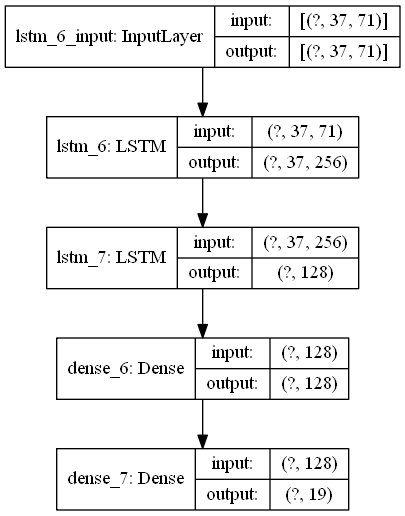

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Uczenie

In [26]:
model.fit(X_train,Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)

Train on 99435 samples
Epoch 1/50
99435/99435 - 129s - loss: 0.5292 - accuracy: 0.1947
Epoch 2/50
99435/99435 - 127s - loss: 0.5216 - accuracy: 0.1887
Epoch 3/50
99435/99435 - 126s - loss: 0.4355 - accuracy: 0.2133
Epoch 4/50
99435/99435 - 127s - loss: 0.4552 - accuracy: 0.1852
Epoch 5/50
99435/99435 - 126s - loss: 0.4454 - accuracy: 0.2057
Epoch 6/50
99435/99435 - 129s - loss: 0.4118 - accuracy: 0.2208
Epoch 7/50
99435/99435 - 127s - loss: 0.4015 - accuracy: 0.2268
Epoch 8/50
99435/99435 - 126s - loss: 0.3876 - accuracy: 0.2243
Epoch 9/50
99435/99435 - 129s - loss: 0.3724 - accuracy: 0.2187
Epoch 10/50
99435/99435 - 127s - loss: 0.3702 - accuracy: 0.2472
Epoch 11/50
99435/99435 - 130s - loss: 0.3677 - accuracy: 0.2259
Epoch 12/50
99435/99435 - 128s - loss: 0.3356 - accuracy: 0.2363
Epoch 13/50
99435/99435 - 128s - loss: 0.3511 - accuracy: 0.2581
Epoch 14/50
99435/99435 - 138s - loss: 0.3536 - accuracy: 0.2685
Epoch 15/50
99435/99435 - 161s - loss: 0.3668 - accuracy: 0.2564
Epoch 16/50

## Zapis modelu od pliku

In [27]:
model.save("../resources/trained_model.h5", save_format='tf')

## Zapis danych testowych do pliku

In [28]:
np.save("../resources/test_data/X_test", X_test)
np.save("../resources/test_data/Y_test", Y_test)

## 